In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
#read the pfac data, which shows the actuall police control area of the county
pfac = pd.read_csv('../data/PFAC.csv')

#read the scenery data 
df = pd.read_csv('scenery.csv', encoding = "ISO-8859-1")
print('Size of the dataset: ' + str(df.shape[0]))

#switch the colomns and rows for pfac data
pfac = pfac.transpose()
pfac.reset_index(inplace = True)

#reset the header of the pfac data
new_header = pfac.iloc[0]
pfac = pfac[1:]
pfac.columns = new_header
crime_df = pd.read_csv('../data/number_crime.csv')

print(pfac.shape[1])

Size of the dataset: 212155
43


In [3]:
#find the county
def matchCounty(area):
    for i in pfac.columns:
        if area in list(pfac[i]):
            return i
    return np.nan

In [4]:
#the unique
len(df['County'].unique())

214

In [5]:
#df['County'].unique()

In [6]:
df['County'] = df['County'].apply(matchCounty)
len(df['County'].unique())

44

In [7]:
sum(df['County'].isnull())

65530

In [8]:
#df['County'].unique()

In [9]:
#df['County'].head(100)

##### comment
drop every column except 'County' and 'Rating'

calculate avg_rating and standard_deviation from 'Rating' and add 'num_pictures'

In [14]:
import statistics

df_rate = df.drop(columns=['ID', 'Place', 'Variance', 'Near', 'Category', 'Image', 'Date', 'URL'])
df_rate = df_rate.dropna()
df_rate['Avg_Rating'] = df_rate['Rating']
df_rate['Standard_Deviation'] = df_rate['Rating']
df_rate = df_rate.drop(columns=['Rating'])
df_rate['num_pictures'] = 1


aggregation_functions = {'Avg_Rating': 'mean', 'Standard_Deviation': 'std', 'num_pictures': 'sum'}
df_rate_mean = df_rate.groupby(df_rate['County']).aggregate(aggregation_functions)
df_rate_mean

,Avg_Rating,Standard_Deviation,num_pictures
County,,,
Avon and Somerset,2.712359,1.873534,4755
Bedfordshire,2.548122,1.870577,1187
Cambridgeshire,2.462462,1.848670,3209
Cheshire,2.526800,1.835459,2296
City of London,3.209225,1.974855,4
Cleveland,2.363048,1.900951,299
Cumbria,2.908924,1.928069,6869
Derbyshire,2.706742,1.929414,2558
Devon and Cornwall,2.788292,1.834246,10616


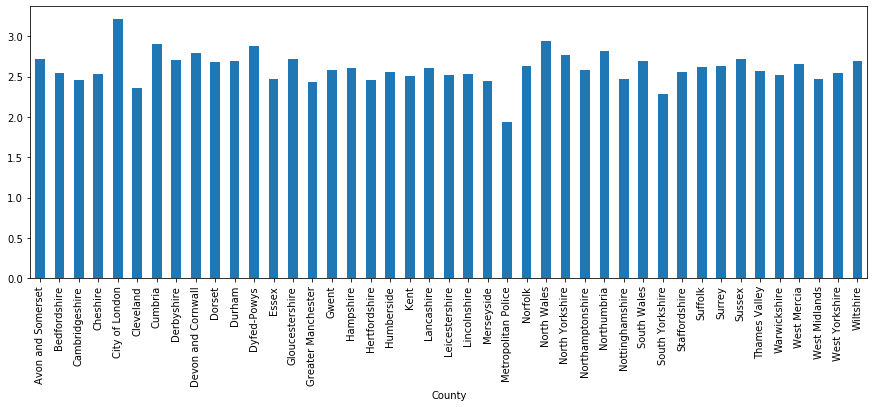

In [75]:
df_rate_mean['Rating'].plot(figsize=(15, 5),kind='bar')